In [1]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud

In [3]:
# 한글 문장 리스트
sentences= [
    "이 영화는 너무 재미있었어요! 흥미진진한 스토리와 뛰어난 연기력으로 완벽한 영화였습니다.",
    "감동적인 이야기와 아름다운 시각 효과로 깊은 감명을 받았습니다. 꼭 추천드리고 싶어요!",
    "배우들의 연기력이 정말 대단하고, 스릴 넘치는 전개로 긴장감을 유지하며 시청할 수 있었습니다.",
    "이 영화는 예술적인 요소와 함께 현실적인 이야기를 잘 담아냈습니다. 마지막까지 흥미로웠어요.",
    "음악과 영상美가 조화롭게 어우러져서 시간 가는 줄 모르고 봤습니다. 정말 멋진 작품이었습니다!",
    "스토리 전개가 예상치 못한 방향으로 흘러가서 더욱 흥미로웠습니다. 진정한 서스펜스였어요.",
    "배경 음악과 색감, 연출이 너무 아름다워서 마음이 따뜻해졌습니다. 강추합니다!",
    "주인공의 성장 이야기와 동시에 사회 문제를 다루면서 생각할 거리도 많았던 영화였습니다.",
    "시대적 배경과 역사적 사건을 재현하면서도 개인 드라마를 담아내어 볼만한 가치가 있는 작품입니다.",
    "여운이 오래 남는 작품으로, 여러모로 생각할 거리를 주었습니다."
]

## 자연어 처리 위한 단어 생성 

In [4]:
# 영어: 단어별 space만 빼고 관사만 빼면 됨 
# 한국어: 조사가 있어서 그걸 제외시켜줘야함, 우선 space로 구분 

# "여행 계획을 세우고 있는데 어디로 갈까요?" -> 6개 
# "맛있는 음식을 먹으러 갈까요?", -> 4개

# 10개이지만 동일한 단어는 겹칠 수 있다. (갈까요) 
# 통으로 만들어 space로 잘라서 그 list에서 동일한 것은 count하고 나머지는 1 
# 단어별로 count되는 방식 

In [4]:
# 앞에 space를 넣어서 sentences라는 list를 string으로 join한다 -> 한 문장으로 만든다
text = ' '.join(sentences)
text 

'이 영화는 너무 재미있었어요! 흥미진진한 스토리와 뛰어난 연기력으로 완벽한 영화였습니다. 감동적인 이야기와 아름다운 시각 효과로 깊은 감명을 받았습니다. 꼭 추천드리고 싶어요! 배우들의 연기력이 정말 대단하고, 스릴 넘치는 전개로 긴장감을 유지하며 시청할 수 있었습니다. 이 영화는 예술적인 요소와 함께 현실적인 이야기를 잘 담아냈습니다. 마지막까지 흥미로웠어요. 음악과 영상美가 조화롭게 어우러져서 시간 가는 줄 모르고 봤습니다. 정말 멋진 작품이었습니다! 스토리 전개가 예상치 못한 방향으로 흘러가서 더욱 흥미로웠습니다. 진정한 서스펜스였어요. 배경 음악과 색감, 연출이 너무 아름다워서 마음이 따뜻해졌습니다. 강추합니다! 주인공의 성장 이야기와 동시에 사회 문제를 다루면서 생각할 거리도 많았던 영화였습니다. 시대적 배경과 역사적 사건을 재현하면서도 개인 드라마를 담아내어 볼만한 가치가 있는 작품입니다. 여운이 오래 남는 작품으로, 여러모로 생각할 거리를 주었습니다.'

In [6]:
## 조사 뺴기 
# 는, 이, 은, 를, 한, 가, ... 
import re
pattern = r'[는은이가을를의과에]'
text_regex = re.sub(pattern=pattern, repl= '', string=text)
# sub는 replace와 비슷   #params: 변경 대상 , 대상을 대체, 어떤 것을 
text_regex
# 완전히 정제되지는 않았다 

' 영화 너무 재미있었어요! 흥미진진한 스토리와 뛰어난 연기력으로 완벽한 영화였습니다. 감동적인 야기와 아름다운 시각 효로 깊 감명 받았습니다. 꼭 추천드리고 싶어요! 배우들 연기력 정말 대단하고, 스릴 넘치 전개로 긴장감 유지하며 시청할 수 있었습니다.  영화 예술적인 요소와 함께 현실적인 야기 잘 담아냈습니다. 마지막까지 흥미로웠어요. 음악 영상美 조화롭게 어우러져서 시간  줄 모르고 봤습니다. 정말 멋진 작품었습니다! 스토리 전개 예상치 못한 방향으로 흘러서 더욱 흥미로웠습니다. 진정한 서스펜스였어요. 배경 음악 색감, 연출 너무 아름다워서 마음 따뜻해졌습니다. 강추합니다! 주인공 성장 야기와 동시 사회 문제 다루면서 생각할 거리도 많았던 영화였습니다. 시대적 배경 역사적 사건 재현하면서도 개인 드라마 담아내어 볼만한 치 있 작품입니다. 여운 오래 남 작품으로, 여러모로 생각할 거리 주었습니다.'

In [11]:
from collections import Counter
text_regex_count =Counter(text_regex.split())
# list를 count
# 글자 한개 되어있는 것 제외해야함 

In [12]:
# 영어가 아닌 언어를 넣을 때는 폰트 연결 필요 (폰트 경로) 

# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'
wordCloud = WordCloud(font_path=font_path, background_color='white')
wordCloud.generate_from_frequencies(text_regex_count)
#무슨 단어가 몇개인 걸 넣어줌 

In [13]:
wordCloud.words_
# wordCloud 내의 변수(어떤 단어가 몇퍼센트인지 인스턴스화 되어있음) 
# Count와 달리 퍼센트로 들어감(전체 평균-macro average) 

{'영화': 1.0,
 '너무': 1.0,
 '영화였습니다.': 1.0,
 '야기와': 1.0,
 '정말': 1.0,
 '음악': 1.0,
 '배경': 1.0,
 '생각할': 1.0,
 '재미있었어요!': 0.5,
 '흥미진진한': 0.5,
 '스토리와': 0.5,
 '뛰어난': 0.5,
 '연기력으로': 0.5,
 '완벽한': 0.5,
 '감동적인': 0.5,
 '아름다운': 0.5,
 '시각': 0.5,
 '효로': 0.5,
 '깊': 0.5,
 '감명': 0.5,
 '받았습니다.': 0.5,
 '꼭': 0.5,
 '추천드리고': 0.5,
 '싶어요!': 0.5,
 '배우들': 0.5,
 '연기력': 0.5,
 '대단하고,': 0.5,
 '스릴': 0.5,
 '넘치': 0.5,
 '전개로': 0.5,
 '긴장감': 0.5,
 '유지하며': 0.5,
 '시청할': 0.5,
 '수': 0.5,
 '있었습니다.': 0.5,
 '예술적인': 0.5,
 '요소와': 0.5,
 '함께': 0.5,
 '현실적인': 0.5,
 '야기': 0.5,
 '잘': 0.5,
 '담아냈습니다.': 0.5,
 '마지막까지': 0.5,
 '흥미로웠어요.': 0.5,
 '영상美': 0.5,
 '조화롭게': 0.5,
 '어우러져서': 0.5,
 '시간': 0.5,
 '줄': 0.5,
 '모르고': 0.5,
 '봤습니다.': 0.5,
 '멋진': 0.5,
 '작품었습니다!': 0.5,
 '스토리': 0.5,
 '전개': 0.5,
 '예상치': 0.5,
 '못한': 0.5,
 '방향으로': 0.5,
 '흘러서': 0.5,
 '더욱': 0.5,
 '흥미로웠습니다.': 0.5,
 '진정한': 0.5,
 '서스펜스였어요.': 0.5,
 '색감,': 0.5,
 '연출': 0.5,
 '아름다워서': 0.5,
 '마음': 0.5,
 '따뜻해졌습니다.': 0.5,
 '강추합니다!': 0.5,
 '주인공': 0.5,
 '성장': 0.5,
 '동시': 0.5,
 '사회': 0.5,
 '문제': 0.5,
 '

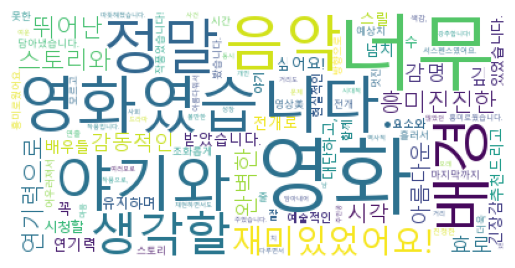

In [14]:
import matplotlib.pyplot as plt 
plt.imshow(wordCloud)
#축 없애거나 바탕색 바꾸기
plt.axis('off')
# 이미지 보여주기
plt.show()